# Lab 5. Constrained optimization: equality and inequality constaints
# Lab 6. Stochastic Gradient Descent for SVM

### Analise Burko & Marcos de la Torre

In [2]:
import QPGC
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [3]:
help(QPGC.QPGenericConstraints)

# x = QPGC.QPGenericConstraints(G, g, A, C, b, d)

Help on function QPGenericConstraints in module QPGC:

QPGenericConstraints(G, g, A, C, b, d)
    Convex optimization problem with equality and inequality constraints:
     
               min f(x)=1/2 x^T G X + g^T x     s.t.   A^T x = b i C^T x >= d
    
    Call it with:
    
    x = QPGenericConstrains(G, g, A, C, b, d)
    
    Notation:
    
    n = number of variables
    p = number of equality constants
    m = number of inequality constants
     
    Dimensions:   G -> n x n
                  g -> n x 1
                  A -> n x p
                  C -> n x m
                  b -> p x 1  
                  d -> m x 1



## 5.1. Generate dataset

In [6]:
def load_data(N, sep=True):
    """generates input data for dual formulation, set sep==False to return a non-separable dataset"""
    
    m1 = [0.,0.]
    s1 = [[1,-0.9],[-0.9,1]]
    s2 = [[1,0],[0,1]]
    
    if sep==True:
        m2 = [3.,6.] 
        s2 = [[1,0],[0,1]]
    elif sep==False:
        m2 = [1.,2.] 
        s2 = [[1,0],[0,1]] 

    c1 = np.random.multivariate_normal(m1,s1,N//2)
    x1 = c1[:,0]
    y1 = c1[:,1]

    c2 = np.random.multivariate_normal(m2,s2,N//2)
    x2 = c2[:,0]
    y2 = c2[:,1]
    
    x = np.concatenate((c1,c2), axis=0).T
    y = np.concatenate(([1]*(N//2), [-1]*(N//2)), axis=0)
    
#     plt.figure(figsize=(8,6))
#     plt.scatter(x1,y1, color = 'b')
#     plt.scatter(x2,y2, color = 'r')
#     plt.legend(['Class 1', 'Class 2'])
#     plt.show()
    
    return x, y, x1, y1, x2, y2

## 5.2 Implementation of the dual formulation

In [46]:
def dual_formulation(N, K, sep=True):
    """implements the dual formulation and returns the optimal values of alpha (vector of non-negative lagrange multipliers)"""
    
    # generate data
    X, y, x1, y1, x2, y2= load_data(N, sep)  
    print(X.shape)

    # build KKT system
    m = len(y)  # number of inequality constraints
    Y = np.diag(y)
    G = Y@X.T@X@Y
    g = -np.ones(m)
    A = np.expand_dims(y, axis=1)
    C = np.concatenate((np.eye(m), -np.eye(m)), axis=1)
    b = np.array([0])
    d = np.concatenate((np.repeat(0, m), np.repeat(-K, m)))
    
    # optimize SVM hyperplane
    alphas = QPGC.QPGenericConstraints(G, g, A, C, b, d)
    
    y = np.expand_dims(y, axis=1)
    print(y.shape)
    alphas = np.expand_dims(alphas, axis=1)
    print(alphas.shape)
    
    # hyperplane parameter
    # w parameter in vectorized form
    w = ((y * alphas).T @ X.T).reshape(-1,1)
    print(w.shape)
    
    b = y - np.dot(X.T, w)
    print(b.shape)
    
    #Display results
    print('Alphas = ',alphas[alphas > 1e-4])
    print('w = ', w.flatten())
    print('b = ', b[0])

    a = -w[0] / w[1]
    xx = np.linspace(0,12)
 
    
    # plot data + hyperplane 
    plt.figure(figsize=(8,6))
    plt.scatter(x1,y1, alpha=0.5, color = 'b')
    plt.scatter(x2,y2, alpha=0.5, color = 'r')
    plt.legend(['Class 1', 'Class 2'])
    
    x_coord = np.array(plt.gca().get_xlim())
    y_coord = -b[0]/w[1] - w[0]/w[1] * x_coord
    
    plt.plot(x_coord, y_coord.T, color='black')
    plt.plot(x_coord, y_coord.T-1/np.linalg.norm(w), 'b-.')
    plt.plot(x_coord, y_coord.T+1/np.linalg.norm(w), 'r-.')
    plt.show()
    


(2, 20)
(20, 1)
(20, 1)
(2, 1)
(20, 1)
Alphas =  [0.02407743 0.05949019 0.08356764]
w =  [-0.30786714 -0.26898532]
b =  [0.91009247]


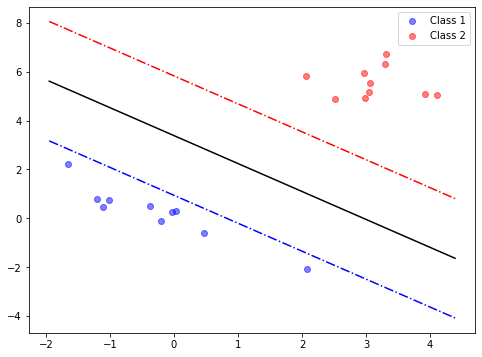

In [121]:
dual_formulation(20, 1, sep=True)

## 5.3. Experiments

### Test Case 1: separable, 2pts/class, small K

(2, 4)
(4, 1)
(4, 1)
(2, 1)
(4, 1)
Alphas =  [0.03812845 0.0269758  0.01115265]
w =  [-0.16110051 -0.22428446]
b =  [0.94105908]


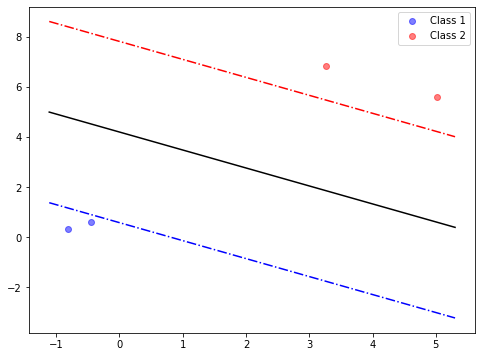

In [50]:
dual_formulation(4, 1)

### Test Case 2: 100 pts/class

(2, 200)
(200, 1)
(200, 1)
(2, 1)
(200, 1)
Alphas =  [0.0305945 0.1099701 0.1405646]
w =  [-0.30212962 -0.43571425]
b =  [1.36380091]


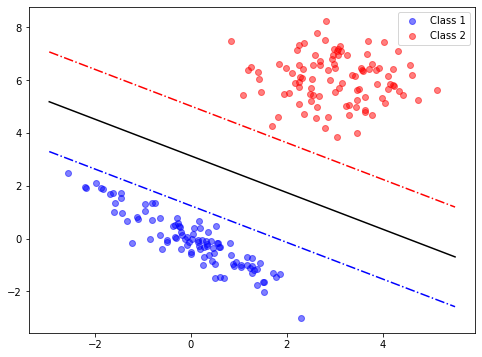

In [52]:
dual_formulation(200, 1)

### Test Case 3: separable, range of K values

In [53]:
n = 40
K = [1, 50, 500, 10e4]  

(2, 40)
(40, 1)
(40, 1)
(2, 1)
(40, 1)
Alphas =  [0.12873536 0.12873536]
w =  [-0.350827   -0.36659396]
b =  [1.30088839]


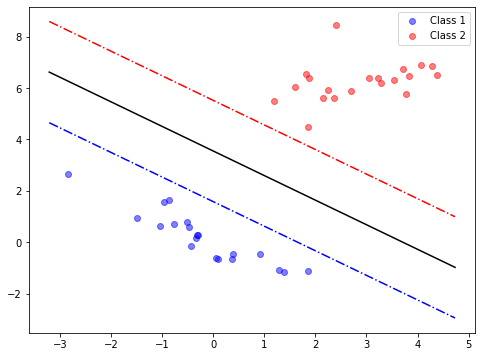

(2, 40)
(40, 1)
(40, 1)
(2, 1)
(40, 1)
Alphas =  [0.09583165 0.00939273 0.10540896 0.00027403 0.00011225]
w =  [-0.28715982 -0.36106718]
b =  [1.09209911]


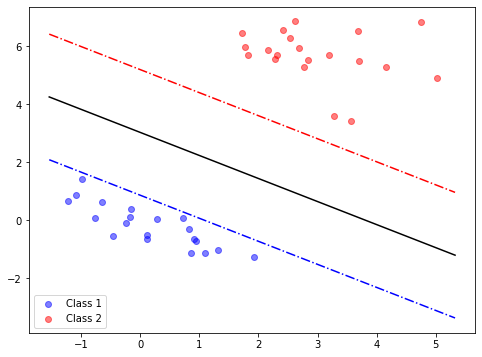

(2, 40)
(40, 1)
(40, 1)
(2, 1)
(40, 1)
Alphas =  [0.00303754 0.00228459 0.00302807 0.00183601 0.00282014 0.0016315
 0.00433881 0.00480213 0.00357618 0.00502371 0.0043407  0.00130766
 0.00308979 0.00669418 0.00421697 0.00436635 0.00796427 0.0034817
 0.00832407 0.00505336 0.02893306 0.00114139 0.00169592 0.00223178
 0.00483125 0.00760886 0.0006459  0.00264432 0.00217503 0.00447153
 0.00407801 0.00329529 0.0025043  0.00166059 0.00053491 0.00113142
 0.00481847 0.00190338 0.00225736 0.00265496]
w =  [-0.25997869 -0.40229086]
b =  [0.8247834]


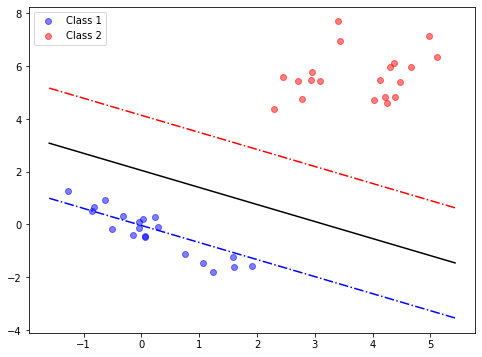

(2, 40)
(40, 1)
(40, 1)
(2, 1)
(40, 1)
Alphas =  [0.00393532 0.0074687  0.00265591 0.00508415 0.00887323 0.00303568
 0.00192834 0.00699906 0.00318782 0.00209536 0.00378618 0.00615215
 0.00640013 0.00405333 0.00493472 0.00395115 0.00197678 0.00892406
 0.00329559 0.00437243 0.00547425 0.01014041 0.00658023 0.00290016
 0.00181449 0.00600547 0.0037727  0.00492347 0.00671927 0.00880471
 0.00162031 0.00443442 0.00358143 0.00498683 0.00373071 0.00448245
 0.00540047 0.00200031 0.00347599 0.00226202]
w =  [-0.31300737 -0.51130788]
b =  [0.8129847]


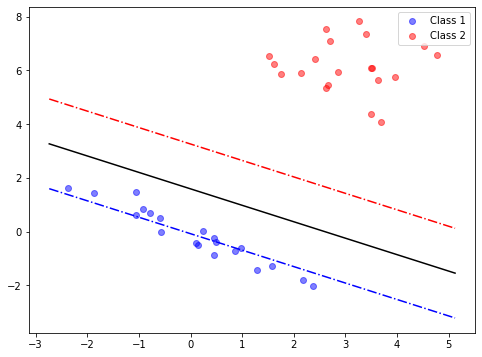

In [59]:
for k in K:
    dual_formulation(n, k, sep=True)

### Test Case 4: non-separable, range of K values

(2, 40)
(40, 1)
(40, 1)
(2, 1)
(40, 1)
Alphas =  [1.         1.         1.         1.         0.06936056 0.31811922
 1.         1.         1.         1.         0.38747978]
w =  [-1.18802593 -1.38220407]
b =  [1.65206426]


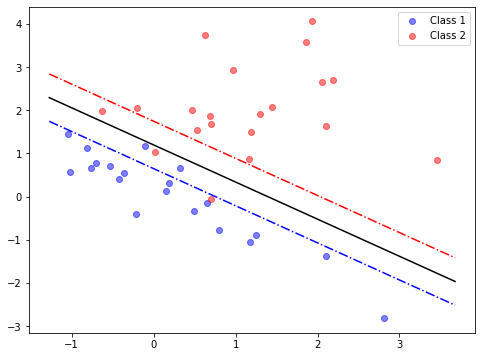

(2, 40)
(40, 1)
(40, 1)
(2, 1)
(40, 1)
Alphas =  [6.70042657e+00 4.86192362e+01 1.91336567e-01 7.00151297e-01
 2.14430339e+00 4.92310184e+01 9.07545383e-01 8.65274317e-02
 4.97069679e+01 2.45639641e-01 4.98176065e+01 1.07638092e-01
 4.98797678e+01 4.98605956e+01 4.99069132e+01 1.72429691e-01
 3.90409826e-01 9.54095930e-02 3.76477280e-01 5.53671159e+00
 3.09748312e-01 4.96803083e+01 5.80619562e-02 4.99253612e+01
 4.13897839e-02 6.11877704e-02 9.49066974e-02 2.31926081e-02
 4.86932253e+01 4.98886378e+01 3.98346259e-02 4.96236881e+01
 4.52702430e-02 4.97270409e+01 2.99999662e-02 4.99572874e+01
 3.97017324e-02 7.58560893e-02 1.63125337e+01 4.98793902e-02]
w =  [-1.45062739 -1.79990472]
b =  [1.25991865]


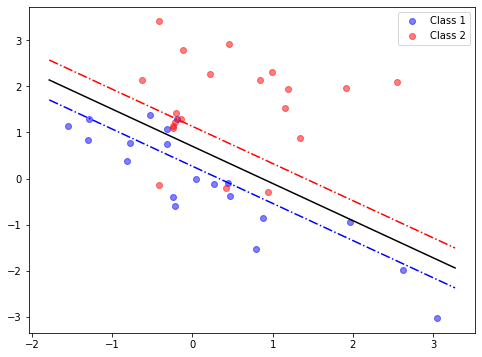

(2, 40)
(40, 1)
(40, 1)
(2, 1)
(40, 1)
Alphas =  [ 63.88945386  15.39481538  13.63157577  33.35594543  13.5988164
  27.3668008   30.61927458 269.65747915   7.80316104   6.44007683
  10.98443811   4.65569807  10.37295157   5.75110066  93.73311422
   6.81922576   2.35423812   5.9223227    7.8697432   17.98161439
   2.14670249   7.04003885  17.19241865  24.71441747   0.65469406
   8.76788019   4.89735171   0.92190783   7.6218796   21.61739902
   4.30309139   2.75746732   0.8669166    3.99453184 483.84655222
   4.03243765  21.1400189   14.94570335  12.68277765   4.05765924]
w =  [-39.12672878 -77.95180074]
b =  [31.02451488]


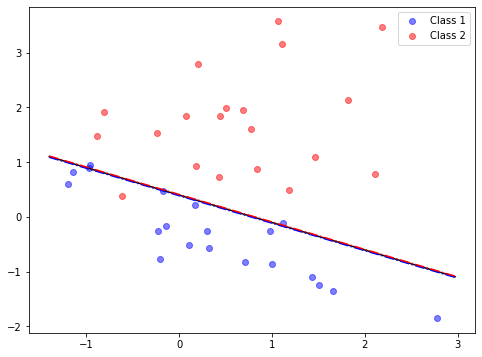

(2, 40)
(40, 1)
(40, 1)
(2, 1)
(40, 1)
Alphas =  [11900.69832647 14263.26356682 38820.72303214 19151.97599975
 12214.04735975 12723.07858743 23354.40189442 20687.57581383
 13823.9891038   8987.77870761 19658.12964325 16140.57118527
 11896.62697856 11951.97033316 13307.00240496  8489.97684649
 18762.42675737 12777.13117218  8091.66320422 14205.72985389
 23721.86910289  2296.3550726  10967.5945512  69201.74323337
  2866.18719463 12761.27587643  6878.89580933  6973.78818421
  4210.01849957  6916.19221426  7965.64408539 23582.10283718
  9649.51598504  6028.21545491  6956.61757891  9401.88851788
  5532.46290763 58371.61831892 25581.46892946 11345.30641756]
w =  [-254907.73768976 -410904.99192558]
b =  [-4193.29739154]


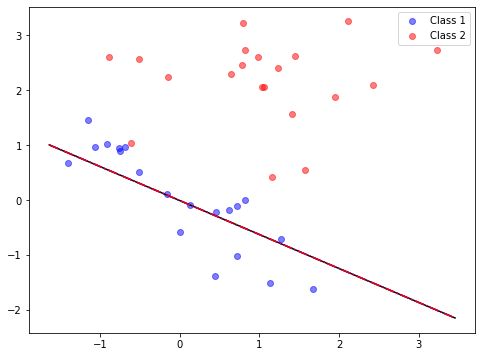

In [83]:
for k in K:
    dual_formulation(n, k, sep=False)

<i> Does the value of K influence the solution you obtain? Does the hyperplane correctly separate the set of points you have> Explain results. </i>
  
 > As shown in the plots above for both separable and non-separable test cases, increasing K reduces the number of misclassified points. This is more apparent in the non-separable tests since misclassification becomes unavoidabe. As K increases the penalization of misclassification is weighted more heavily in the optimization problem, thereby reducing the prioritization of maximizing the separation margin.

## 6.0. Data generation

In [20]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
# Data for toy example with only 2 points per class
x_small = np.array([[0, 1, 1, 2], [1, 0, 1, 1]]).T
y_small = np.array([-1, -1, 1, 1])

In [29]:
# Larger dataset for testing: 100 samples per class

N_samples_per_class = 100
x = np.vstack((np.random.randn(N_samples_per_class, 2),
               np.random.randn(N_samples_per_class, 2) + np.array([3,3])))
y = np.vstack((-1.*np.ones((N_samples_per_class,1)),
               1.*np.ones((N_samples_per_class,1))))

In [89]:
# Function to plot the results
def plot_model(x, y, w, b, x0_min, x0_max):
    # Plot points
    idx = y==1
    plt.scatter(x[idx.ravel(),0], x[idx.ravel(),1], alpha=0.5, color='b')
    idx = y==-1
    plt.scatter(x[idx.ravel(),0], x[idx.ravel(),1], alpha=0.5, color='r')

    # Draw lines for levels 0 (split line), -1 and 1
    # The lines are drawn for x0 between x0_min and x0_max
    def level_line(x0, level):
        return (-b -w[0]*x0 + level) / w[1]    
    plt.plot([x0_min, x0_max], [level_line(x0_min, level= 0), level_line(x0_max, level= 0)], color='black')
    plt.plot([x0_min, x0_max], [level_line(x0_min, level=+1), level_line(x0_max, level=+1)], 'b-.')
    plt.plot([x0_min, x0_max], [level_line(x0_min, level=-1), level_line(x0_max, level=-1)], 'r-.')

    plt.gcf().set_size_inches((9,9))

## 6.1. Classical stochastic gradient descent

In [24]:
# Function to calculate the SVM parameters using stochastic gradient descent
def optimize_stochastic(X, y, num_epochs, lamb=1e-2, ind_print_steps=False):
    '''Obtain the optimum parameters of the SVM using stochastic gradient descent.
       Parameters:
       X, y: input data
       lamb: Cost of missclassifications
       num_epochs: Number of epochs
    '''
    # Initial values
    w = np.array([0,0])
    b = 0

    k = 100 # Inverse of the learning rate

    for epoch in range(num_epochs):
        # Shuffle data
        m = X.shape[0]
        perm = np.random.permutation(m)
        for i in range(m):
            k = k + 0.1
            gamma = 1/k  # Learning rate
            x_act = X[perm[i],:]
            y_act = y[perm[i]]

            # Update w and b based on approximation of gradient
            w_new = w - gamma*(lamb*w)
            b_new = b
            if y_act * (np.dot(w,x_act) + b) <= 1:
                w_new = w_new + gamma * y_act * x_act
                b_new = b_new + gamma * y_act

            w = w_new
            b = b_new
            if ind_print_steps:
                print('x_act = ', x_act)
                print('y_act = ', y_act)
                print('w = ', w)
                print('b = ', b)
    return w, b

In [90]:
# Stochastic gradient descent - Model with toy example
w, b = optimize_stochastic(x_small, y_small, num_epochs=4000)
print('w =', w)
print('b =', b)

w = [2.00088847 2.00099864]
b = -3.001916921916267


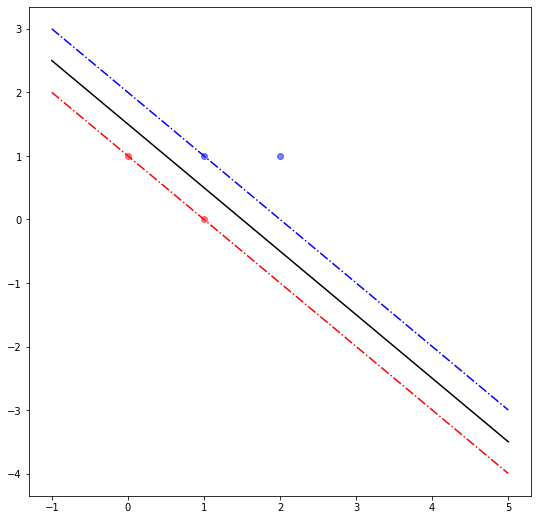

In [91]:
# Plot toy example
plot_model(x_small, y_small, w, b, x0_min=-1, x0_max=5)

In [106]:
# Stochastic gradient descent - Model on test data (100 samples per class)
w, b = optimize_stochastic(x, y, num_epochs=4000)
print('w =', w)
print('b =', b)

w = [0.73613965 1.0235544 ]
b = [-2.69251939]


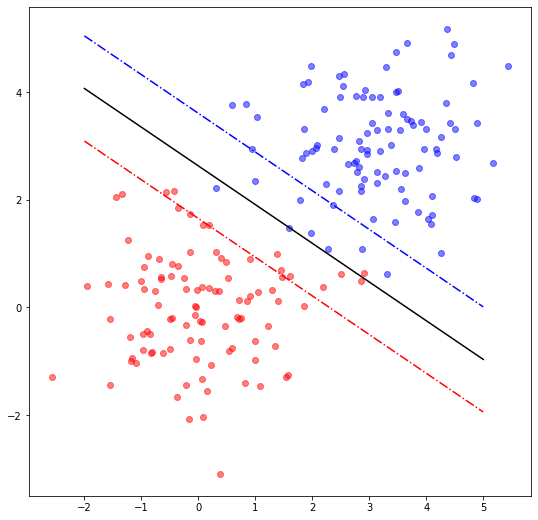

In [108]:
plot_model(x, y, w, b, x0_min=-2, x0_max=5)

## 6.2. Minibatch stochastic gradient descent

In [115]:
# Calculation of f. This is used for the convergence plot.
def f(X, y, lamb, w, b):
    tot = lamb/2*np.dot(w,w)
    for i in range(len(y)):
        term = 1 - y[i] * (np.dot(w,X[i]) + b)
        if term > 0:
            tot = tot + term
    return tot

# Function to calculate the SVM parameters using minibatch stochastic gradient descent
def optimize_minibatch(X, y, num_epochs, batch_size=1, lamb=1e-2,
                       ind_print_steps=False, ind_convergence_plot=False):
    '''Obtain the optimum parameters of the SVM using stochastic gradient descent.
       Parameters:
       X, y: input data
       batch_size: Batch size
       lamb: Cost of missclassifications
       num_epochs: Number of epochs
    '''
    # Initial values
    w = np.array([0,0])
    b = 0
    k = 100 # Inverse of the learning rate (initial value, it will increase every step)
    conv = [] # Data for convergence plot (logarithm of f after each epoch)

    for epoch in range(num_epochs):
        # Shuffle data
        m = X.shape[0]
        perm = np.random.permutation(m)
        X_shuffled = X[perm]
        y_shuffled = y[perm]
        
        # Split data in minibatches of size "batch_size".
        # If m is not divisible by the batch size, we ignore the reminder.        
        for i in range(m//batch_size):
            k = k + 0.1
            gamma = 1/k  # Learning rate
            x_batch = X_shuffled[batch_size*i:batch_size*(i+1),:]
            y_batch = y_shuffled[batch_size*i:batch_size*(i+1)]

            # Update w and b based on approximation of gradient
            w_new = w - gamma*(lamb*w)
            b_new = b
            for j in range(batch_size):
                x_act = x_batch[j,:]
                y_act = y_batch[j]
                if y_act * (np.dot(w,x_act) + b) <= 1:
                    w_new = w_new + gamma * y_act * x_act
                    b_new = b_new + gamma * y_act

            w = w_new
            b = b_new
            if ind_print_steps:
                print('x_act = ', x_act)
                print('y_act = ', y_act)
                print('w = ', w)
                print('b = ', b)
        # Data for convergence plot
        if ind_convergence_plot:
            conv.append(np.log(f(X, y, lamb, w, b)))
        
    if ind_convergence_plot:
        chart_x = np.array(range(len(conv)))
        chart_y = np.array(conv)
        plt.plot(chart_x, chart_y)
        plt.title('Convergence plot')
        plt.show()
        print('Number of epochs:', num_epochs)
        print('Final value of log objective function:', conv[num_epochs-1])

    return w, b

In [95]:
# Minibatch model for toy example
w, b = optimize_minibatch(x_small, y_small, batch_size=2, num_epochs=4000)
print('w =', w)
print('b =', b)

w = [2.00150096 2.0024164 ]
b = -3.0037580594795315


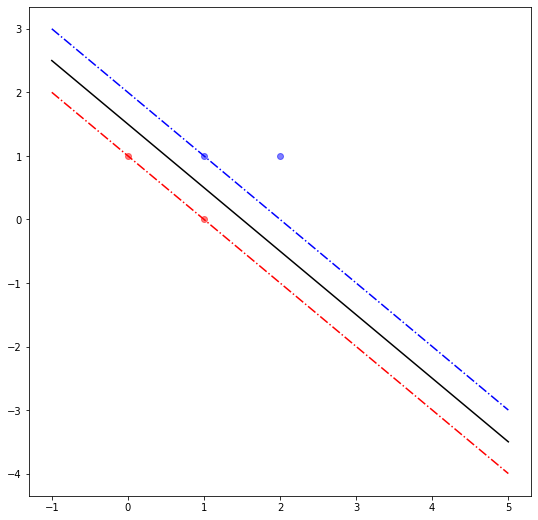

In [96]:
# Plot toy example
plot_model(x_small, y_small, w, b, x0_min=-1, x0_max=5)

In [97]:
# Minibatch stochastic gradient descent (batch size 20) - Model on test data (100 samples per class)
w, b = optimize_minibatch(x, y, batch_size=20, num_epochs=4000)
print('w =', w)
print('b =', b)

w = [1.5586793  2.64818294]
b = [-5.80021498]


In [109]:
# Minibatch stochastic gradient descent (batch size 50) - Model on test data (100 samples per class)
w, b = optimize_minibatch(x, y, batch_size=50, num_epochs=4000)
print('w =', w)
print('b =', b)

w = [1.84783753 3.57238053]
b = [-7.62140229]


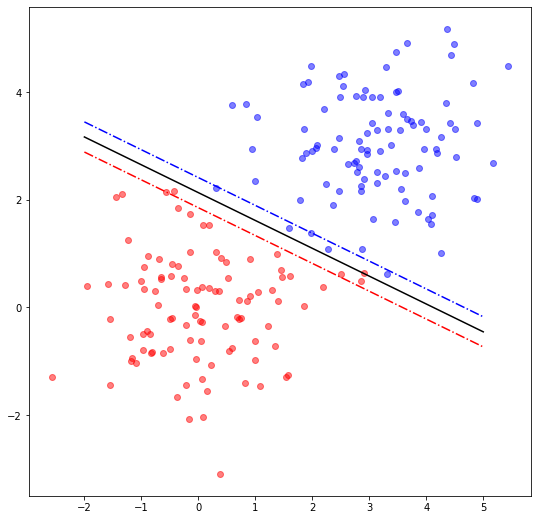

In [110]:
plot_model(x, y, w, b, x0_min=-2, x0_max=5)

## 6.3. Gradient descent (non-stochastic)

In [111]:
# Gradient descent
# We reuse the optimize_minibatch function by setting a batch size equal to the number of samples.
# This way all the samples are processed in the batch, and therefore it is equivalent
# to the non-stochastic algorithm
w, b = optimize_minibatch(x, y, batch_size=2*N_samples_per_class, num_epochs=4000)
print('w =', w)
print('b =', b)

w = [2.64477784 5.1183848 ]
b = [-10.92762595]


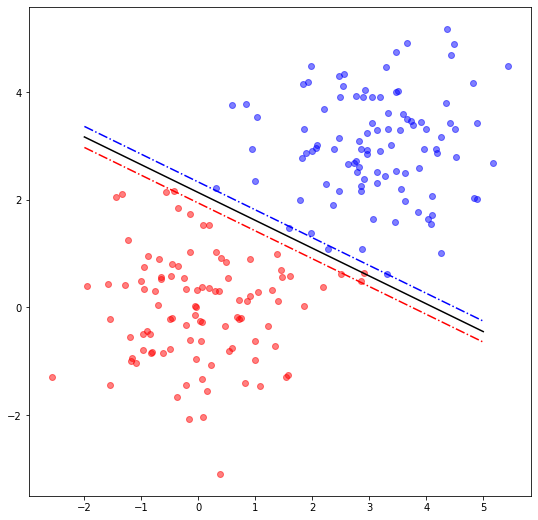

In [112]:
plot_model(x, y, w, b, x0_min=-2, x0_max=5)

In [102]:
# Final run with a large number of epochs, so as to have a reference of the "correct" parameters
w, b = optimize_minibatch(x, y, batch_size=2*N_samples_per_class, num_epochs=10000)
print('w =', w)
print('b =', b)

w = [2.98644045 5.89052413]
b = [-12.45361304]


## 6.4. Convergence

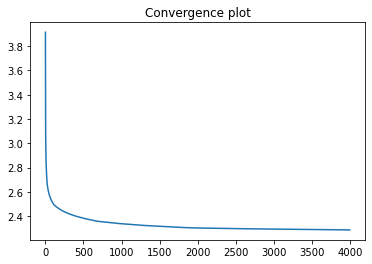

Number of epochs: 4000
Final value of log objective function: [2.28748713]
w = [0.73622259 1.0230839 ]
b = [-2.6918525]


In [118]:
# Stochastic gradient descent (batch size 1)
w, b = optimize_minibatch(x, y, batch_size=1, num_epochs=4000, ind_convergence_plot=True)
print('w =', w)
print('b =', b)

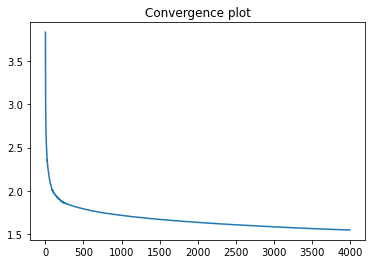

Number of epochs: 4000
Final value of log objective function: [1.55109105]
w = [1.5599943  2.65194419]
b = [-5.80694422]


In [116]:
# Minibatch stochastic gradient descent (batch size 20)
w, b = optimize_minibatch(x, y, batch_size=20, num_epochs=4000, ind_convergence_plot=True)
print('w =', w)
print('b =', b)

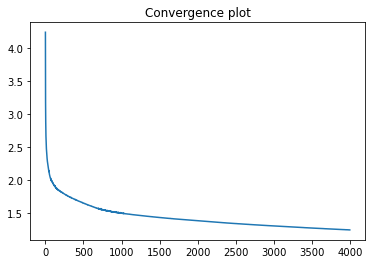

Number of epochs: 4000
Final value of log objective function: [1.2428605]
w = [1.84813488 3.57172376]
b = [-7.61800302]


In [117]:
# Minibatch stochastic gradient descent (batch size 50)
w, b = optimize_minibatch(x, y, batch_size=50, num_epochs=4000, ind_convergence_plot=True)
print('w =', w)
print('b =', b)

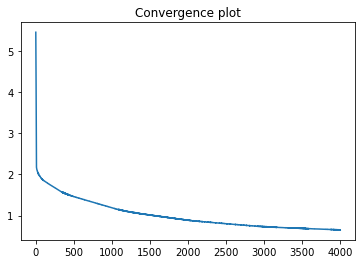

Number of epochs: 4000
Final value of log objective function: [0.65094431]
w = [2.64477784 5.1183848 ]
b = [-10.92762595]


In [119]:
# Gradient descent (non-stochastic)
w, b = optimize_minibatch(x, y, batch_size=2*N_samples_per_class, num_epochs=4000, ind_convergence_plot=True)
print('w =', w)
print('b =', b)

### Comments on convergence speed

We can see that the classical stochastic gradient descent requires more epochs to converge more slowly than the minibatch version. In this example we also see that with a minibatch of 50 we obtain a faster convergence than using 20.
The non-stochastic version, as expected, converges faster in terms of number of epochs.

On the other hand, the larger the batch size, the longer it takes to run each epoch. There is therefore a trade-off. Choosing an optimal batch size would require a larger study measuring not just epochs but timing with different data sizes.

## 6.5. Comparisons between dual and primal approach (PENDING)